## Оглавление
1. [Изучение данных из файла](#data_studying)
2. [Предобработка данных](#pre_processing)
3. [Расчёты и добавление результатов в таблицу](#calculation)
4. [Исследовательский анализ данных](#analysis)
5. [Гипотезы](#hypothesis)
6. [Общий вывод](#sumup)

# Определение перспективного тарифа для телеком-компании

Клиентам компании «Мегалайн» — федерального оператора сотовой связи — предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования** — необходимо понять какой тарифный план, «Смарт» и «Ультра», приносит больше денег компании.

**Ход исследования**

Перед проверкой гипотез понадобится обзор и предобработка данных данных.

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем мы устраним пробемы и проведем исследовательский анализ данных.

Таким образом, исследование пройдёт в четыре этапа:

* Обзор данных.
* Предобработка данных.
* Исследовательский анализ:
 * Посчитаем для каждого пользователя:
   * количество сделанных звонков и израсходованных минут разговора по месяцам;
   * количество отправленных сообщений по месяцам;
   * объем израсходованного интернет-трафика по месяцам;
   * помесячную выручку с каждого пользователя.
 * Опишем поведение клиентов оператора, исходя из выборки. 
 * Выясним, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 
 * Посчитаем среднее количество, дисперсию и стандартное отклонение. 
* Проверка гипотез:
 * Узнаем: 
   * различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»;
   * отличатеся ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.

## 1. Изучение данных из файла
<a name="data_studying"></a>

Изучим входные данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

In [132]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [133]:
calls = pd.read_csv('/datasets/calls.csv', sep=',')
display(calls.head(10)) # выведем 10 первых строк таблицы calls

calls.info() # выведем сводную информацию о таблице

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [134]:
internet = pd.read_csv('/datasets/internet.csv', sep=',')
display(internet.head(10)) # выведем 10 первых строк таблицы internet

internet.info() # выведем сводную информацию о таблице

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [135]:
messages = pd.read_csv('/datasets/messages.csv', sep=',')
display(messages.head(10)) # выведем 10 первых строк таблицы messages

messages.info() # выведем сводную информацию о таблице

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [136]:
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
display(tariffs) # выведем таблицу tariffs

tariffs.info() # выведем сводную информацию о таблице

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [137]:
users = pd.read_csv('/datasets/users.csv', sep=',')
display(users.head(10)) # выведем 10 первых строк таблицы users

users.info() # выведем сводную информацию о таблице

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод
В таблицах представлены данные данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Предварительно можно утверждать, что данных достаточно для выполнения задачи. Но для окончательного ответа на этот вопрос нужно провести предобработку данных. 

На данный момент очевидно, что необходимо:
* заменить тип данных для столбцов `churn_date`, `session_date`, `message_date`, `reg_date` и `call_date`
* проверить данные на пропуски, дубликаты и аномалии.

Сделаем это в следующем блоке.

## 2. Предобработка данных
<a name="pre_processing"></a>

In [138]:
# заменим тип данных для call_date
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d') # дату на datetime64, т.к. это дата

calls.info() # проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [139]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d') # дату на datetime64, т.к. это дата

internet.info() # проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [140]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d') # дату на datetime64, т.к. это дата

messages.info() # проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [141]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d') # дату на datetime64, т.к. это дата
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
users.info() # проверим результат


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [142]:
# проверим количество пропущенных значений
display(calls.isna().sum()) # пропущенных данных нет
display(internet.isna().sum()) # пропущенных данных нет
display(messages.isna().sum()) # пропущенных данных нет
display(tariffs.isna().sum()) # пропущенных данных нет

display(users.isna().sum()) # 92% пропущенных значений 
users.isna().mean() # в этом столбце гораздо больше пропущенных значений, чем указанных.
# Однако, согласно комментариям к данным, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. 
# Поэтому оставим пропуски нетронутыми


id           0
call_date    0
duration     0
user_id      0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [143]:
# проверим данные таблицы calls на аномалии
display(calls['id'].describe())
display(calls['call_date'].describe(datetime_is_numeric=True))
display(calls['duration'].describe())
display(calls['user_id'].describe())

# аномалий нет


count     202607
unique    202607
top       1000_0
freq           1
Name: id, dtype: object

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

count    202607.000000
mean       1253.940619
std         144.722751
min        1000.000000
25%        1126.000000
50%        1260.000000
75%        1379.000000
max        1499.000000
Name: user_id, dtype: float64

In [144]:
# проверим данные таблицы internet на аномалии
display(internet['Unnamed: 0'].sort_values(ascending=False)) # похоже, что столбец полностью дублирует столбец с индексами, 
# удалим его
internet = internet.drop(['Unnamed: 0'], axis=1)


display(internet['id'].describe()) # аномалий нет
display(internet['mb_used'].describe()) # в некоторых строках есть нули, проверим их ниже
display(internet['session_date'].describe(datetime_is_numeric=True)) # аномалий нет
display(internet['user_id'].describe()) # аномалий нет


149395    149395
149394    149394
149393    149393
149392    149392
149391    149391
           ...  
4              4
3              3
2              2
1              1
0              0
Name: Unnamed: 0, Length: 149396, dtype: int64

count     149396
unique    149396
top       1000_0
freq           1
Name: id, dtype: object

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

count    149396.000000
mean       1252.099842
std         144.050823
min        1000.000000
25%        1130.000000
50%        1251.000000
75%        1380.000000
max        1499.000000
Name: user_id, dtype: float64

In [145]:
#  проверим строки с нулевыми значениями
display(len(internet.query('mb_used == 0'))) # узнаем их общее количество
display(len(internet.query('mb_used == 0')) / len(internet['mb_used'])) 
        


19598

0.13118155773916304

В 13% данных в колонке `mb_used` указаны нули. Возможно, пользователи начинали сессию, но на тот момент у них уже закончился пакет интернета, либо причина в провайдере - сбои в предоставлении услуги. Проверим, зависят ли нулевые показатели от дня месяца или месяца года.

In [146]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month # Создадим колонку month
internet['day'] = pd.DatetimeIndex(internet['session_date']).day # Создадим колонку day

# проверим, есть ли зависимость в частоте сессий с нулевыми данными от дня месяца
zero_mb_day = (
    internet.query('mb_used == 0')
    .pivot_table(index= 'day', values = 'session_date', aggfunc='count')
    .sort_values(by='session_date', ascending=False)
)

# проверим, есть ли зависимость в частоте сессий с нулевыми данными от месяца
zero_mb_month = (
    internet.query('mb_used == 0')
    .pivot_table(index= 'month', values = 'user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=False)
)

display(zero_mb_day)
display(zero_mb_month)

# переименум столбец tariff 
users = users.rename(
columns={
'tariff': 'tariff_name',}
) 


# проверим, не зависит ли частота сессий с нулевыми данными от тарифа
internet_user_zero = internet.merge(users, on='user_id', how='inner').query('mb_used == 0')
internet_user_zero.pivot_table(index='tariff_name', columns='month', values = 'session_date', aggfunc='count')


,session_date
day,
29,734
30,724
28,708
26,708
21,705
27,694
17,693
13,672
22,669


,user_id
month,
12,3321
11,2907
10,2642
9,2314
8,2083
7,1760
6,1401
5,1199
4,819


month,1,2,3,4,5,6,7,8,9,10,11,12
tariff_name,,,,,,,,,,,,
smart,141,345,566,739,1065,1259,1585,1889,2103,2437,2664,3030
ultra,10,33,57,80,134,142,175,194,211,205,243,291


Похоже, что количество таких сессий нарастало к концу года, распределение по дням месяца практически равномерное. А значит дело не в пакете интернета, который обычно заканчивается к концу месяца. От тарифа этот факт также не зависит, очевидна лишь тенденция к увеличению таких сессий к концу года. Вероятнее всего, проблема на стороне провайдера.

In [147]:
# проверим данные таблицы messages на аномалии
display(messages['id'].describe())
display(messages['message_date'].describe(datetime_is_numeric=True))
display(messages['user_id'].describe())

# аномалий нет

count     123036
unique    123036
top       1000_0
freq           1
Name: id, dtype: object

count                           123036
mean     2018-09-04 15:28:42.227640576
min                2018-01-02 00:00:00
25%                2018-07-09 00:00:00
50%                2018-09-20 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object

count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64

In [148]:
# проверим данные таблицы tariffs на аномалии
display(tariffs['messages_included'].describe())
display(tariffs['mb_per_month_included'].describe())
display(tariffs['minutes_included'].describe())
display(tariffs['rub_monthly_fee'].describe())
display(tariffs['rub_per_gb'].describe())
display(tariffs['rub_per_message'].describe())
display(tariffs['rub_per_minute'].describe())
display(tariffs['tariff_name'].unique())


# аномалий нет

count       2.000000
mean      525.000000
std       671.751442
min        50.000000
25%       287.500000
50%       525.000000
75%       762.500000
max      1000.000000
Name: messages_included, dtype: float64

count        2.000000
mean     23040.000000
std      10861.160159
min      15360.000000
25%      19200.000000
50%      23040.000000
75%      26880.000000
max      30720.000000
Name: mb_per_month_included, dtype: float64

count       2.000000
mean     1750.000000
std      1767.766953
min       500.000000
25%      1125.000000
50%      1750.000000
75%      2375.000000
max      3000.000000
Name: minutes_included, dtype: float64

count       2.000000
mean     1250.000000
std       989.949494
min       550.000000
25%       900.000000
50%      1250.000000
75%      1600.000000
max      1950.000000
Name: rub_monthly_fee, dtype: float64

count      2.000000
mean     175.000000
std       35.355339
min      150.000000
25%      162.500000
50%      175.000000
75%      187.500000
max      200.000000
Name: rub_per_gb, dtype: float64

count    2.000000
mean     2.000000
std      1.414214
min      1.000000
25%      1.500000
50%      2.000000
75%      2.500000
max      3.000000
Name: rub_per_message, dtype: float64

count    2.000000
mean     2.000000
std      1.414214
min      1.000000
25%      1.500000
50%      2.000000
75%      2.500000
max      3.000000
Name: rub_per_minute, dtype: float64

array(['smart', 'ultra'], dtype=object)

In [149]:
# проверим данные таблицы users на аномалии
display(users['user_id'].describe())
display(users['age'].describe())
display(users['churn_date'].describe(datetime_is_numeric=True))
display(users['city'].unique())
display(users['first_name'].unique())
display(users['last_name'].unique())
display(users['reg_date'].describe(datetime_is_numeric=True))
display(users['tariff_name'].unique())

# аномалий нет


count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

count                               38
mean     2018-11-13 00:37:53.684210432
min                2018-08-17 00:00:00
25%                2018-10-14 00:00:00
50%                2018-11-24 00:00:00
75%                2018-12-15 12:00:00
max                2018-12-30 00:00:00
Name: churn_date, dtype: object

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

count                              500
mean     2018-06-30 18:57:35.999999744
min                2018-01-01 00:00:00
25%                2018-04-07 12:00:00
50%                2018-07-02 12:00:00
75%                2018-09-29 00:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

array(['ultra', 'smart'], dtype=object)

In [150]:
# проверим данные на наличие дубликатов
display(calls.duplicated().sum())
display(messages.duplicated().sum())
display(internet.duplicated().sum())
display(tariffs.duplicated().sum())
users.duplicated().sum()

0

0

0

0

0

### Вывод

Предобработка показала, что в данных есть пропуски и аномалии. Также потребовалась замена типов данных на datetime для столбцов `churn_date`, `session_date`, `message_date`, `reg_date` и `call_date`.

Основные выводы:
* в столбце `churn_date` таблицы users гораздо больше пропущенных значений (92%), чем указанных. Однако, согласно комментариям к данным, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому мы оставили пропуски нетронутыми;
* удалили столбец `Unnamed: 0` таблицы internet, т.к. он полностью дублирует столбец с индексами;
* в 13% данных в колонке `mb_used` таблицы internet указаны нули. После проверки зависимости нулевых показателей от дня месяца, месяца года или тарифа было обнаружено, что количество таких сессий нарастало к концу года, а распределение по дням месяца практически равномерное. А значит дело не в пакете интернета, который обычно заканчивается к концу месяца. От тарифа этот факт также не зависит, очевидна лишь тенденция к увеличению таких сессий к концу года. Вероятнее всего, проблема на стороне провайдера - сбой в предоставлении услуги.



## 3. Расчёты и добавление результатов в таблицу
<a name="calculation"></a>

### Задача
Посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [151]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month # добавим стобец month

calls['duration'] = np.ceil(calls['duration']) # округлим продолжительность звонков до минуты в сторону увеличения

# Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_month.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_month # проверим результат




,user_id,month,calls_count,calls_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


In [152]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month # добавим столбец month

# Посчитаем для каждого пользователя количество отправленных сообщений по месяцам
messages_month = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index()
messages_month.columns = ['user_id', 'month', 'messages_count']
messages_month # проверим результат

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [153]:
# Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_month.columns = ['user_id', 'month', 'mb_used_sum']

internet_month # проверим результат

,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [154]:
# объединим таблицы
joint = calls_month.merge(messages_month, on=['user_id', 'month'], how='outer')
joint_1 = joint.merge(internet_month, on=['user_id', 'month'], how='outer')
joint_2 = joint_1.merge(users, on='user_id', how='left')
joint_final = joint_2.merge(tariffs, on='tariff_name', how='left')
joint_final = joint_final.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1) #удалим лишние стобцыjoint_final.head()

In [155]:
# после слияния таблиц появились пропуски для тех пользователей, которые не звонили / писали смс / пользовались интернетом.
display(joint_final.isna().sum())

# Заменим эти пропуски на нули
joint_final = joint_final.fillna(0)
joint_final.isna().sum()

user_id                    0
month                      0
calls_count               40
calls_sum                 40
messages_count           497
mb_used_sum               11
city                       0
tariff_name                0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

user_id                  0
month                    0
calls_count              0
calls_sum                0
messages_count           0
mb_used_sum              0
city                     0
tariff_name              0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [156]:

def calc_revenue(row):
    internet = np.ceil(row['mb_used_sum'] / 1024)
    internet_include = np.ceil(row['mb_per_month_included'] / 1024)
    msg = row['messages_count']
    msg_include = row['messages_included']
    minute = row['calls_sum'] 
    minute_include = row['minutes_included']
    
    revenue = row['rub_monthly_fee']
    revenue += max(0 , internet - internet_include) * row['rub_per_gb']
    revenue += max(0 , msg - msg_include) * row['rub_per_message']
    revenue += max(0 , minute - minute_include) * row['rub_per_minute']
    
    return revenue
    
joint_final['revenue'] = joint_final.apply(calc_revenue, axis=1)
joint_final.head() # проверим результат



,user_id,month,calls_count,calls_sum,messages_count,mb_used_sum,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0


In [157]:
# Посчитаем, какой тариф приносит больше денег компании
revenue_tariffs = joint_final.pivot_table(index='tariff_name', values='revenue', aggfunc=['sum', 'mean'])
revenue_tariffs

,sum,mean
,revenue,revenue
tariff_name,,
smart,2875351.0,1289.973531
ultra,2039100.0,2070.152284


Из данных выше можно сделать вывод, что несмотря на то, что в среднем каждый пользователь тарифа Ultra приносит компании в 1,6 раза больше денег, общая выручка от пользователей тарифа Smart в 1,4 раз выше.

## 4. Исследовательский анализ данных
<a name="analysis"></a>

### Задача
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [158]:

joint_final['gb_used_sum'] = (joint_final['mb_used_sum'] / 1024) # создадим столбец с трафиком в Гб
# сгруппируем данные по общему количеству звонков, сообщений и интернет-трафика по тарифам и месяцам
joint_final.groupby(['tariff_name', 'month'])[['calls_sum','messages_count',"gb_used_sum"]].sum()


calls_sum  messages_count  gb_used_sum
tariff_name month                                        
smart       1         6931.0           620.0   282.682031
            2        17324.0          1397.0   656.864404
            3        30034.0          2453.0  1135.761963
            4        41119.0          3443.0  1472.426006
            5        54618.0          4762.0  2176.299795
            6        64885.0          5478.0  2529.611592
            7        82079.0          6784.0  3090.208223
            8        99045.0          7905.0  3812.030488
            9       111439.0          8746.0  4139.580557
            10      125284.0          9927.0  4811.127080
            11      137544.0         10768.0  5213.906387
            12      161275.0         12130.0  5961.234482
ultra       1         3853.0           304.0   115.494268
            2         7131.0           527.0   275.998535
            3        18117.0          1195.0   633.608750
            4        25191.0          1736.0   903.854873
            5        34192.0          2536.0  1266.925049
            6        40295.0          3505.0  1552.436426
            7        49667.0          4536.0  1821.392119
            8        54653.0          5183.0  2045.544775
            9        62036.0          6013.0  2156.730342
            10       68644.0          7187.0  2407.789541
            11       72545.0          7476.0  2589.289912
            12       82400.0          8425.0  2958.252920

In [159]:
# посчитаем общее количество пользователей в каждом из тарифов
user = joint_final.groupby(['tariff_name'])['user_id'].nunique()
user


tariff_name
smart    350
ultra    148
Name: user_id, dtype: int64

Из данных можно сделать вывод, что наблюдается устойчивый рост в течение года в потреблении всех услуг провайдера: количества потраченных минут, отправленных смс и использованных гигабайт интернет-трафика. Эта тенденция характерна для обоих тарифов компании — Smart и Ultra. 

Общее количество пользователей в тарифе Ultra меньше (скорее всего из-за его стоимости - он в четыре раза дороже тарифа Smart), поэтому и общие показатели на графике ниже. 

Однако несмотря на то, что тариф Ultra в четыре раза дороже тарифа Smart, общий объем по интернет-трафику и количеству звонков ниже лишь в два раза, а по количеству отправленных смс — даже почти в полтора. Это может означать, что пользователи, выбирающие более дорогой тариф, делают это исходя из своих реальных потребностей в большем количестве минут, смс и Гб.

In [160]:
# посчитаем среднее количество звноков, сообщений и интернет-трафика по тарифам и месяцам
joint_final_mean = joint_final.pivot_table(index=['tariff_name', 'month'], values=['calls_sum','messages_count',"gb_used_sum"]).reset_index()
joint_final_mean.columns = ['tariff_name', 'month', 'calls_mean', 'messages_mean', 'gb_used_mean'] #переименуем столбцы
joint_final_mean = joint_final_mean.pivot_table(index=['tariff_name', 'month'], values=['calls_mean','messages_mean',"gb_used_mean"])
display(joint_final_mean)

# посчитаем среднее количество звноков, сообщений и интернет-трафика по тарифам в год
joint_final_tariffs_mean_year = joint_final.groupby('tariff_name')[['calls_sum','messages_count',"gb_used_sum"]].mean()
joint_final_tariffs_mean_year




calls_mean  gb_used_mean  messages_mean
tariff_name month                                         
smart       1      203.852941     18.235294       8.314177
            2      298.689655     24.086207      11.325248
            3      390.051948     31.857143      14.750155
            4      367.133929     30.741071      13.146661
            5      387.361702     33.773050      15.434750
            6      395.640244     33.402439      15.424461
            7      408.353234     33.751244      15.374170
            8      421.468085     33.638298      16.221406
            9      428.611538     33.638462      15.921464
            10     426.136054     33.765306      16.364378
            11     435.265823     34.075949      16.499704
            12     478.560831     35.994065      17.689123
ultra       1      428.111111     33.777778      12.832696
            2      297.125000     21.958333      11.499939
            3      489.648649     32.297297      17.124561
            4      458.018182     31.563636      16.433725
            5      510.328358     37.850746      18.909329
            6      479.702381     41.726190      18.481386
            7      545.791209     49.846154      20.015298
            8      510.775701     48.439252      19.117241
            9      539.443478     52.286957      18.754177
            10     558.081301     58.430894      19.575525
            11     541.380597     55.791045      19.323059
            12     592.805755     60.611511      21.282395

,calls_sum,messages_count,gb_used_sum
tariff_name,,,
smart,417.934948,33.384029,15.828503
ultra,526.623350,49.363452,19.012505


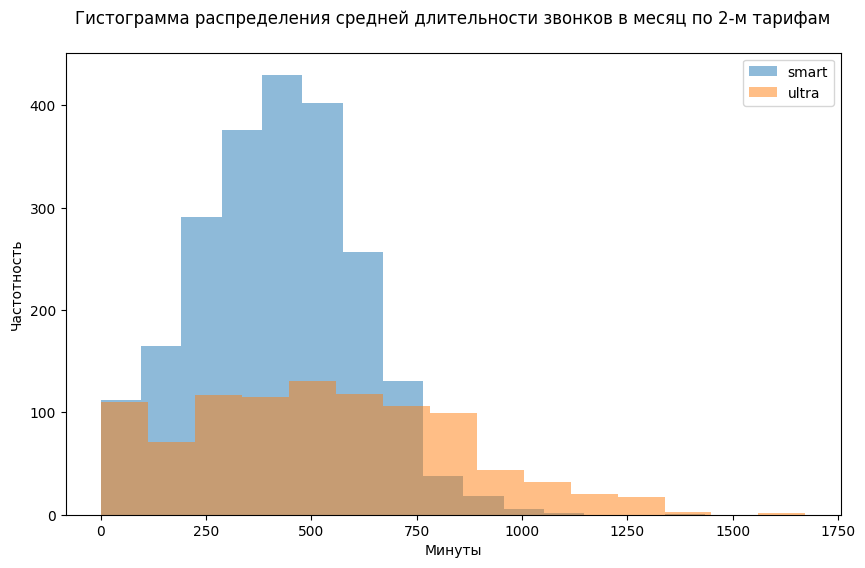

In [161]:
# построим график среднего количества потраченных минут за каждый месяц

plt.figure(figsize=(10, 6))
joint_final['calls_sum'][joint_final['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
joint_final['calls_sum'][joint_final['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()


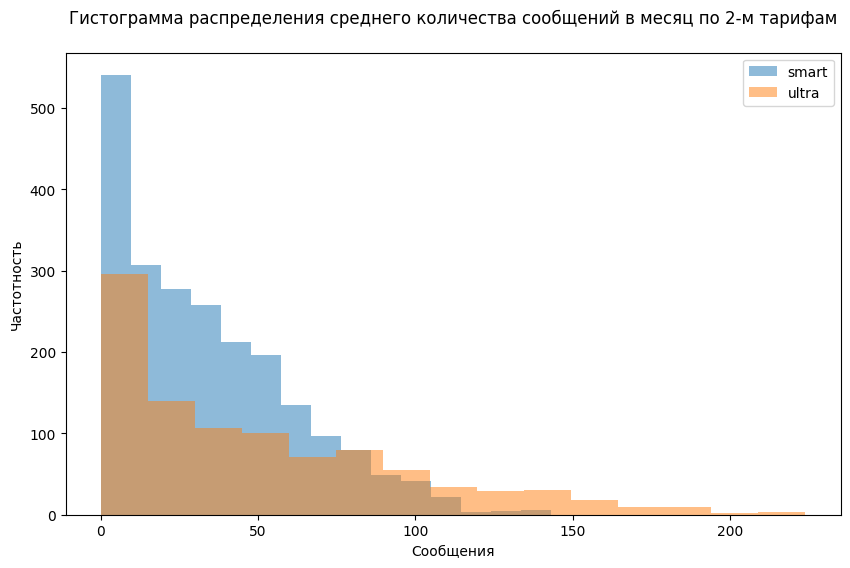

In [162]:
# построим график среднего количества отправленных сообщений за каждый месяц

plt.figure(figsize=(10, 6))
joint_final['messages_count'][joint_final['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
joint_final['messages_count'][joint_final['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего количества сообщений в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Сообщения')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()


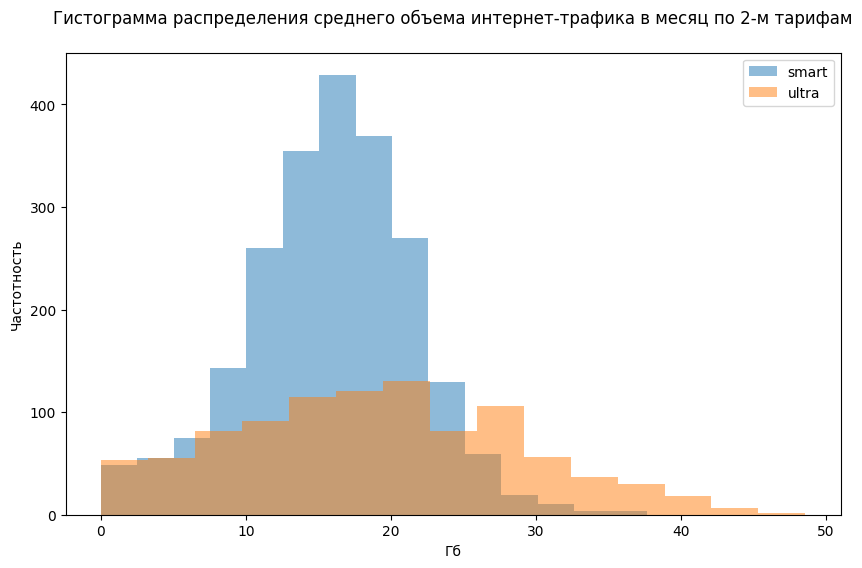

In [163]:
# построим график среднего объёма интернет-трафика за каждый месяц

plt.figure(figsize=(10, 6))
joint_final['gb_used_sum'][joint_final['tariff_name'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
joint_final['gb_used_sum'][joint_final['tariff_name'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Гб')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])
plt.show()


Средние показатели подтверждают наше наблюдение: пользователи более дорогого тарифа используют гораздо больше минут, смс и гигабайт в месяц, чем клиенты на более дешевом тарифе. Особенно это заметно на примере смс, в меньшей степени — в звонках, и меньше всего — в интернет-трафике.

На графиках, отражающих средние показатели, менее заметен рост активности в течение года. Это скорее всего обусловлено тем, что количество абонентов провайдера росло, влияя на общие показатели потребления услуг. Однако средние цифры менялись не так стремительно.

In [164]:
# посчитаем дисперсию и стандартное отклонение по показателям длительности звонков, количеству сообщений 
# и интернет-трафику по каждому тарифу

# создадим dataframe с необходимыми данными по звонкам
ultra_calls = joint_final[['tariff_name', 'calls_sum']].query('tariff_name == "ultra"')
smart_calls = joint_final[['tariff_name', 'calls_sum']].query('tariff_name == "smart"')

# переименуем колонки
ultra_calls = ultra_calls.rename(
columns={
'calls_sum': 'ultra_calls',}
)

smart_calls = smart_calls.rename(
columns={
'calls_sum': 'smart_calls',}
)

# создадим dataframe с необходимыми данными по сообщениям
ultra_messages = joint_final[['tariff_name', 'messages_count']].query('tariff_name == "ultra"')
smart_messages = joint_final[['tariff_name', 'messages_count']].query('tariff_name == "smart"')

# переименуем колонки
ultra_messages = ultra_messages.rename(
columns={
'messages_count': 'ultra_messages',}
)

smart_messages = smart_messages.rename(
columns={
'messages_count': 'smart_messages',}
)

# создадим dataframe с необходимыми данными по интернету
ultra_internet = joint_final[['tariff_name', 'gb_used_sum']].query('tariff_name == "ultra"')
smart_internet = joint_final[['tariff_name', 'gb_used_sum']].query('tariff_name == "smart"')

# переименуем колонки
ultra_internet = ultra_internet.rename(
columns={
'gb_used_sum': 'ultra_internet',}
)

smart_internet = smart_internet.rename(
columns={
'gb_used_sum': 'smart_internet',}
)

In [165]:
# посчитаем дисперсию по показателям длительности звонков в тарифе ultra 
variance_ultra_calls = np.var(ultra_calls, ddof=1)
# посчитаем дисперсию по показателям длительности звонков в тарифе smart 
variance_smart_calls = np.var(smart_calls, ddof=1)
# посчитаем дисперсию по показателям количества сообщений в тарифе ultra 
variance_ultra_messages = np.var(ultra_messages, ddof=1)
# посчитаем дисперсию по показателям количества сообщений в тарифе smart 
variance_smart_messages = np.var(smart_messages, ddof=1)
# посчитаем дисперсию по показателям объема трафика в тарифе ultra 
variance_ultra_internet = np.var(ultra_internet, ddof=1)
# посчитаем дисперсию по показателям объема трафика в тарифе smart 
variance_smart_internet = np.var(smart_internet, ddof=1)

display(variance_ultra_calls)
display(variance_smart_calls)
display(variance_ultra_messages)
display(variance_smart_messages)
display(variance_ultra_internet)
variance_smart_internet

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3755: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


ultra_calls    100873.633397
dtype: float64

smart_calls    36219.315784
dtype: float64

ultra_messages    2285.266143
dtype: float64

smart_messages    796.812958
dtype: float64

ultra_internet    97.037329
dtype: float64

smart_internet    32.865998
dtype: float64

In [166]:
# посчитаем стандартное отклонение по показателям длительности звонков в тарифе ultra 
standard_deviation_ultra_calls = np.std(ultra_calls, ddof=1)
# посчитаем стандартное отклонение по показателям длительности звонков в тарифе smart 
standard_deviation_smart_calls = np.std(smart_calls, ddof=1)
# посчитаем стандартное отклонение по показателям количества сообщений в тарифе ultra 
standard_deviation_ultra_messages = np.std(ultra_messages, ddof=1)
# посчитаем стандартное отклонение по показателям количества сообщений в тарифе smart
standard_deviation_smart_messages = np.std(smart_messages, ddof=1)
# посчитаем стандартное отклонение по показателям объема трафика в тарифе ultra 
standard_deviation_ultra_internet = np.std(ultra_internet, ddof=1)
# посчитаем стандартное отклонение по показателям объема трафика в тарифе smart
standard_deviation_smart_internet = np.std(smart_internet, ddof=1)

display(standard_deviation_ultra_calls)
display(standard_deviation_smart_calls)
display(standard_deviation_ultra_messages)
display(standard_deviation_smart_messages)
display(standard_deviation_ultra_internet)
standard_deviation_smart_internet

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


ultra_calls    317.606098
dtype: float64

smart_calls    190.31373
dtype: float64

ultra_messages    47.804457
dtype: float64

smart_messages    28.227876
dtype: float64

ultra_internet    9.850753
dtype: float64

smart_internet    5.732887
dtype: float64

### Вывод

Проведенный исследовательский анализ данных показал:

* наблюдается устойчивый рост в течение года в потреблении всех услуг провайдера: количества потраченных минут, отправленных смс и использованных гигабайт интернет-трафика. Эта тенденция характерна для обоих тарифов компании — Smart и Ultra;
* несмотря на то, что тариф Ultra в четыре раза дороже тарифа Smart, общий объем по интернет-трафику и количеству звонков ниже лишь в два раза, а по количеству отправленных смс — даже почти в полтора. Это может означать, что пользователи, выбирающие более дорогой тариф, делают это исходя из своих реальных потребностей в большем количестве минут, смс и Гб;
* пользователи более дорогого тарифа используют в месяц в среднем гораздо больше минут, смс и гигабайт в месяц, чем клиенты на более дешевом тарифе. Особенно это заметно на примере смс, в меньшей степени — в звонках, и меньше всего — в интернет-трафике;
* дисперсия, как и стандартное отклонение, в тарифе ultra выше для звонков, смс и интернета:
   * Звонки: Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число минут разговора в месяц значительно меньше заложенных в него 3000.
   * Сообщения: Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число сообщений в месяц во много раз меньше заложенных в него 1000.
   * Интернет: Дисперсия и стандартное отклонение выше на тарифе Ультра. Пользователи этого тарифа НЕ всегда укладываются в установленные лимиты (30 Гб), хотя и реже пользователей тарифа Смарт.


## 5. Гипотезы
<a name="hypothesis"></a>

### Задача
Проверьте гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

**Сформулируем и проверим гипотезы**:
* H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
* H₁: средние выручки пользователей тарифов «Ультра» и «Смарт» отличаются.


In [167]:

#создадим DataFrame с данными о выручке пользователей тарифов Smart и Ultra
smart_revenue = joint_final.query('tariff_name == "smart"')['revenue'].reset_index(drop=True)
ultra_revenue = joint_final.query('tariff_name == "ultra"')['revenue'].reset_index(drop=True)

alpha = .05 # зададим критический уровень статистической значимости

# 
results = st.ttest_ind(
    smart_revenue, 
    ultra_revenue, 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [168]:
# Мы можем проверить результат, вычислив средние двух выборок — они небольшого размера
joint_final.pivot_table(index='tariff_name', values='revenue')

# Средние действительно не равны

,revenue
tariff_name,
smart,1289.973531
ultra,2070.152284


Мы сформулировали нулевую гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт», т.к. нулевой гипотезой всегда должно проверяться равенство. Альтернативной гипотезой, соответственно, будет неравенство. Для оценки мы использовали данные о помесячной выручке с каждого пользователя, рассчитанной из проанализированных данных.

T-test показал, что:
* мы отвергли нулевую гипотезу о равенстве средней выручки абонентов, использующих тариф «Ультра» и абонентов тарифа «Смарт»;
* pvalue намного ниже заданного порогового значения в 5%, т.е. вероятность получить такой результат случайно чрезвычайно низка.

**Сформулируем и проверим гипотезы**:
* H₀: средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны;
* H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [169]:
#создадим DataFrame с данными о выручке пользователей из Москвы и других регионов
Moscow_revenue = joint_final.query('city == "Москва"')['revenue'].reset_index(drop=True)
other_cities__revenue = joint_final.query('city != "Москва"')['revenue'].reset_index(drop=True)

alpha = .05 # зададим критический уровень статистической значимости


results = st.ttest_ind(
    Moscow_revenue, 
    other_cities__revenue, 
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [170]:
# Мы можем проверить результат, вычислив средние двух выборок — они небольшого размера
# Создадим новый столбец с категориями городов
def city_cat(row):
    city = row['city']
    city_category = 0
    if city == 'Москва':
        city_category = 'Москва'
    else:
        city_category = 'Другие'
    return city_category
        
        
joint_final['city_category'] = joint_final.apply(city_cat, axis=1)

joint_final.pivot_table(index='city_category', values='revenue')

# Средние не равны, но показатели очень близки

,revenue
city_category,
Другие,1524.936227
Москва,1546.713584


Мы сформулировали нулевую гипотезу о равенстве средней выручки пользователей из Москвы и других городов, т.к. нулевой гипотезой всегда должно проверяться равенство. Альтернативной гипотезой, соответственно, будет неравенство. Для оценки мы использовали данные о помесячной выручке с каждого пользователя, рассчитанной из проанализированных данных.

T-test показал, что:

* мы не можем отвергнуть нулевую гипотезу о равенстве средней выручки абонентов из Москвы и других городов;
* pvalue составляет 53%, т.е. вероятность получить такой результат случайно достаточно велика.

## 6. Общий вывод
<a name="sumup"></a>

Для корректировки рекламного бюджета коммерческому департаменту компании «Мегалайн» необходимо было понять, какой тариф приносит больше денег: «Смарт» и «Ультра». Мы сделали предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении были данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Мы проанализировали поведение клиентов, рассмотрели две гипотезы и сделали вывод.

В ходе исследования мы проверили данные на ошибки и оценили их влияние на исследование. Затем мы устранили проблемы в данных и провели исследовательский анализ.

Для каждого пользователя мы посчитали:

   - количество сделанных звонков и израсходованных минут разговора по месяцам;
   - количество отправленных сообщений по месяцам;
   - объем израсходованного интернет-трафика по месяцам;
   - помесячную выручку.

На основании анализа мы сделали вывод, что наблюдается устойчивый рост потребления всех услуг провайдера в течение года: количества потраченных минут, отправленных смс и использованных гигабайт интернет-трафика. Эта тенденция характерна для обоих тарифов компании — Smart и Ultra. Общее количество пользователей в тарифе Ultra меньше (скорее всего из-за его стоимости - он в четыре раза дороже тарифа Smart), поэтому и общие показатели на графике ниже. Однако несмотря на то, что тариф Ultra дороже тарифа Smart, общий объем по интернет-трафику и количеству звонков ниже лишь в два раза, а по количеству отправленных смс — даже почти в полтора. Это может означать, что пользователи, выбирающие более дорогой тариф, делают это исходя из своих реальных потребностей в большем количестве минут, смс и Гб.

- В среднем в месяц пользователи тарифа Smart разговаривают 421 минуту, отправляют 38 смс-сообщений и тратят 15 Гб трафика. Пользователи тарифа Ultra разговаривают 556 минут, отправляют 61 смс-сообщение и тратят 18 Гб трафика.
Средние показатели подтверждают наше наблюдение: пользователи более дорогого тарифа используют гораздо больше минут, смс и гигабайт в месяц, чем клиенты на более дешевом тарифе. Особенно это заметно на примере смс, в меньшей степени — в звонках, и меньше всего — в интернет-трафике. На графиках, отражающих средние полказатели, менее заметен рост активности в течение года. Это скорее всего обусловлено тем, что количество абонентов провайдера росло, влияя на общие показатели потребления услуг. Однако средние цифры менялись не так стремительно.

Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число минут разговора в месяц значительно меньше заложенных в него 3000.
Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число сообщений в месяц во много раз меньше заложенных в него 1000.
Дисперсия и стандартное отклонение выше на тарифе Ультра. Пользователи этого тарифа НЕ всегда укладываются в установленные лимиты, хоте и реже пользователей тарифа Смарт.

Затем мы сформулировали нулевую гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт». Альтернативной гипотезой, соответственно, стало неравенство. Для оценки мы использовали данные о помесячной выручке с каждого пользователя, рассчитанной из проанализированных данных.

В результате проведения T-test мы отвергли нулевую гипотезу о равенстве средней выручки абонентов, использующих тариф «Ультра» и абонентов тарифа «Смарт» (pvalue оказался намного ниже заданного порогового значения в 5%, т.е. вероятность получить такой результат случайно чрезвычайно низка).

Затем мы сформулировали нулевую гипотезу о равенстве средней выручки пользователей из Москвы и других городов. Альтернативной гипотезой, соответственно, было неравенство. Для оценки мы также использовали данные о помесячной выручке с каждого пользователя, рассчитанной из проанализированных данных.

T-test показал, что мы не можем отвергнуть нулевую гипотезу о равенстве средней выручки абонентов из Москвы и других городов (pvalue составил 53%, т.е. вероятность получить такой результат случайно достаточно велика).

Исходя из поставленной цели мы можем сделать вывод, что несмотря на то, что в среднем каждый пользователь тарифа Ultra приносит компании в 1,6 раза больше денег, общая выручка от пользователей тарифа Smart в 1,4 раз выше.